In [1]:
import networkx as nx

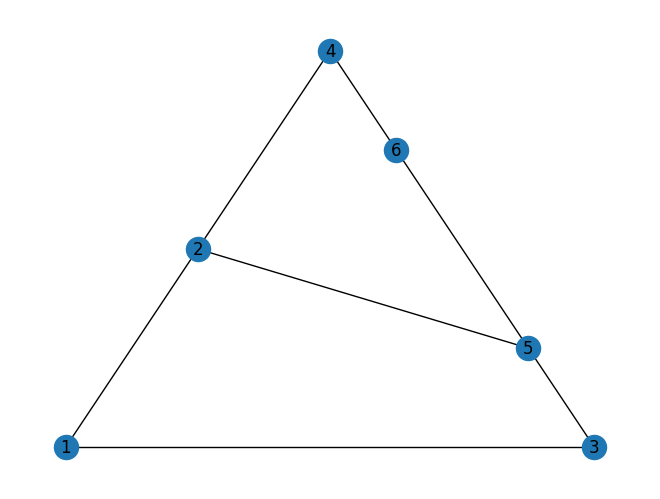

In [2]:
G = nx.Graph()
G.add_nodes_from(range(1,7))
G.add_edges_from([(1,2),(1,3),(2,4),(2,5),(3,5),(4,6),(5,6)])
nx.draw_planar(G, with_labels=True)

In [7]:
G.has_edge(1,3)

True

In [52]:
def pair_disparity(shortest_paths, spl):
    if len(shortest_paths)==1:
        return 0.0
    
    path_graphs = {}
    for i,path in enumerate(shortest_paths):
        path_graphs[i] = nx.path_graph(path)
        
    disparity = 0
    pairs = []
    
    for idx1,p1 in path_graphs.items():
        for idx2,p2 in path_graphs.items():
            if idx1 != idx2 and set([idx1,idx2]) not in pairs:
                pairs.append(set([idx1,idx2]))
                its = nx.intersection(p1,p2)
                #print('Intersecting paths', idx1, 'and', idx2)
                disp = 1 - nx.number_of_edges(its)/spl
                #print('Relative disparity:', disp)
                disparity += disp
    #print('\nPair disparity:', disparity/len(pairs))
    return disparity/len(pairs)

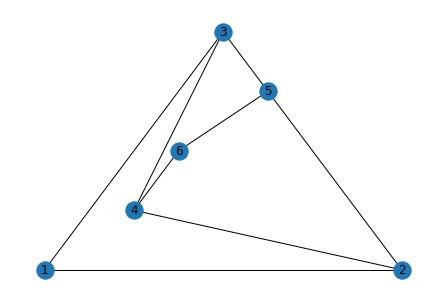

In [48]:
G.add_edge(3,4)
nx.draw_planar(G, with_labels=True)

In [55]:
src, dst = 1,6

path_gen = nx.all_shortest_paths(G,src,dst)
list_paths = list(path_gen)
spl = nx.shortest_path_length(G,src,dst)

disparity = pair_disparity(list_paths, spl)
disparity

0.7777777777777778

In [73]:
[n for n in nx.common_neighbors(G,2,4)]

[]